In [153]:
import psycopg2
import pandas as pd
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
%matplotlib inline

In [45]:
pg_connection = psycopg2.connect(
    dbname="postgres",
    user="apparao",
    password="!bern@HARD23",
    host="thedb.postgres.database.azure.com",
    port="5432"
)

pg_cursor = pg_connection.cursor()

In [46]:
query = 'select * from pres_election.census_data'

In [47]:
pg_cursor.execute(query)
rows = pg_cursor.fetchall()
census_columns = [col[0] for col  in pg_cursor.description]

In [48]:
census_results_df = pd.DataFrame(rows, columns=census_columns)

In [50]:
census_results_df.head()

,COUNTY,FIPS,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,...,POPULATION_BLACK_FEMALE,POPULATION_NA_OR_AN_ALL,POPULATION_NA_OR_AN_MALE,POPULATION_NA_OR_AN_FEMALE,YEAR,ALAND,AWATER,area_sqm,area_sqmi,area_sqkm
0,"Linn County, Missouri",0500000US29115,27.0,9.0,18.0,2.0,0.0,2.0,228.0,107.0,...,9.0,9.0,29.0,115.0,2012.0,1.594365e+09,14991074.0,1.609356e+09,621.37,1609.36
1,"Howell County, Missouri",0500000US29091,93.0,24.0,69.0,0.0,0.0,0.0,657.0,281.0,...,207.0,171.0,29.0,91.0,2012.0,2.401562e+09,2913503.0,2.404476e+09,928.37,2404.48
2,"Johnson County, Missouri",0500000US29101,578.0,229.0,349.0,59.0,43.0,16.0,1695.0,930.0,...,121.0,122.0,29.0,101.0,2012.0,2.147771e+09,10185875.0,2.157957e+09,833.19,2157.96
3,"Laclede County, Missouri",0500000US29105,198.0,35.0,163.0,22.0,19.0,3.0,694.0,342.0,...,87.0,39.0,29.0,105.0,2012.0,1.980566e+09,8515354.0,1.989081e+09,767.99,1989.08
4,"Maries County, Missouri",0500000US29125,42.0,12.0,30.0,0.0,0.0,0.0,55.0,48.0,...,14.0,30.0,29.0,125.0,2012.0,1.364867e+09,7638777.0,1.372506e+09,529.93,1372.51


In [51]:
census_results_df.describe()

,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,POPULATION_TWO_OR_MORE_RACE_FEMALE,POPULATION_WHITE_NOT_LATINO_ALL,...,POPULATION_BLACK_FEMALE,POPULATION_NA_OR_AN_ALL,POPULATION_NA_OR_AN_MALE,POPULATION_NA_OR_AN_FEMALE,YEAR,ALAND,AWATER,area_sqm,area_sqmi,area_sqkm
count,3.542600e+04,35426.000000,35426.000000,35426.000000,35426.000000,35426.000000,3.542600e+04,35426.000000,35426.000000,3.542600e+04,...,35426.000000,35426.000000,35426.000000,35426.000000,35426.000000,3.540300e+04,3.540300e+04,3.540300e+04,35403.000000,35403.000000
mean,5.299778e+03,2521.013832,2778.764495,177.534777,88.996923,88.537854,4.227083e+03,2110.132925,2116.950517,6.110625e+04,...,409.870293,413.735844,31.288686,102.969232,2017.000226,2.833486e+09,2.124737e+08,3.045959e+09,1176.046135,3045.959496
std,3.955446e+04,18788.989266,20776.033095,1999.885159,1012.822526,987.993402,2.073566e+04,10372.841016,10367.883160,1.408110e+05,...,1710.461899,1784.346381,16.276868,106.709712,3.162572,9.216265e+09,1.211036e+09,9.759868e+09,3768.288578,9759.867745
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,1.000000,1.000000,2012.000000,5.300265e+06,0.000000e+00,5.300297e+06,2.050000,5.300000
25%,2.900000e+01,8.000000,16.000000,0.000000,0.000000,0.000000,1.900000e+02,94.000000,90.000000,7.532500e+03,...,12.000000,10.000000,19.000000,35.000000,2014.000000,1.085115e+09,7.006691e+06,1.126956e+09,435.120000,1126.960000
50%,1.320000e+02,54.000000,76.000000,2.000000,0.000000,0.000000,5.630000e+02,287.000000,272.000000,1.919200e+04,...,55.000000,50.000000,30.000000,79.000000,2017.000000,1.565688e+09,1.936210e+07,1.657590e+09,640.000000,1657.590000
75%,6.950000e+02,306.000000,392.000000,33.000000,16.000000,16.000000,2.040000e+03,1026.000000,1018.750000,5.189500e+04,...,214.000000,208.000000,46.000000,133.000000,2020.000000,2.368604e+09,6.068558e+07,2.523488e+09,974.320000,2523.490000
max,1.488626e+06,694508.000000,794118.000000,103982.000000,53596.000000,50386.000000,1.355710e+06,683352.000000,672358.000000,2.731605e+06,...,56336.000000,54760.000000,72.000000,840.000000,2022.000000,3.770346e+11,2.599228e+10,3.829841e+11,147870.310000,382984.120000


In [52]:
census_results_df = census_results_df[census_results_df.GEO_STATE_FIPS != 72]

In [53]:
census_results_df.groupby('YEAR').count()

,COUNTY,FIPS,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,...,POPULATION_BLACK_MALE,POPULATION_BLACK_FEMALE,POPULATION_NA_OR_AN_ALL,POPULATION_NA_OR_AN_MALE,POPULATION_NA_OR_AN_FEMALE,ALAND,AWATER,area_sqm,area_sqmi,area_sqkm
YEAR,,,,,,,,,,,,,,,,,,,,,
2012.0,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,...,3221,3221,3221,3221,3221,3218,3218,3218,3218,3218
2013.0,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,...,3221,3221,3221,3221,3221,3218,3218,3218,3218,3218
2014.0,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3218,3218,3218,3218,3218
2015.0,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
2016.0,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
2017.0,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
2018.0,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
2019.0,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,...,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
2020.0,3221,3221,3221,3221,3221,3221,3221,3221,3221,3221,...,3221,3221,3221,3221,3221,3219,3219,3219,3219,3219


In [54]:
census_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35426 entries, 0 to 35425
Data columns (total 42 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   COUNTY                                           35426 non-null  object 
 1   FIPS                                             35426 non-null  object 
 2   POPULATION_ASIAN_ALL                             35426 non-null  float64
 3   POPULATION_ASIAN_MALE                            35426 non-null  float64
 4   POPULATION_ASIAN_FEMALE                          35426 non-null  float64
 5   POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL     35426 non-null  float64
 6   POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE    35426 non-null  float64
 7   POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE  35426 non-null  float64
 8   POPULATION_TWO_OR_MORE_RACE_ALL                  35426 non-null  float64
 9   POPULATION_TWO_OR_MORE_RACE_

In [55]:
census_2012 = census_results_df[census_results_df.YEAR == 2012]

In [56]:
query = 'select * from pres_election.countypres'

In [57]:
pg_connection = psycopg2.connect(
    dbname="postgres",
    user="apparao",
    password="!bern@HARD23",
    host="thedb.postgres.database.azure.com",
    port="5432"
)

pg_cursor = pg_connection.cursor()
pg_cursor.execute(query)
rows = pg_cursor.fetchall()
county_pres_columns = [col[0] for col  in pg_cursor.description]

In [58]:
couonty_pres_df = pd.DataFrame(rows, columns=county_pres_columns)

In [59]:
couonty_pres_df

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...
72612,2020,WYOMING,WY,WASHAKIE,56043,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245,4032,20220315,TOTAL
72613,2020,WYOMING,WY,WESTON,56045,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,20220315,TOTAL
72614,2020,WYOMING,WY,WESTON,56045,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46,3560,20220315,TOTAL
72615,2020,WYOMING,WY,WESTON,56045,US PRESIDENT,OTHER,OTHER,47,3560,20220315,TOTAL


In [60]:
import duckdb
%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [61]:
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

In [62]:
%%sql

SELECT 
    county_name,
    state,
    CASE WHEN len(county_fips) == 4 THEN '0' || county_fips ELSE county_fips END as FIPS,
    totalvotes,
    SUM(CASE WHEN party = 'REPUBLICAN' THEN candidatevotes ELSE 0 END) as GOP,
    SUM(CASE WHEN party = 'DEMOCRAT' THEN candidatevotes ELSE 0 END) as DEM
FROM couonty_pres_df
WHERE year = 2012
GROUP BY 
    county_name,
    state,
    county_fips,
    totalvotes

,county_name,state,FIPS,totalvotes,GOP,DEM
0,BALDWIN,ALABAMA,01003,85338,66016.0,18424.0
1,BARBOUR,ALABAMA,01005,11509,5550.0,5912.0
2,CHOCTAW,ALABAMA,01023,7968,4152.0,3786.0
3,YUMA,ARIZONA,04027,41953,23352.0,18059.0
4,BAXTER,ARKANSAS,05005,19339,13688.0,5172.0
...,...,...,...,...,...,...
3153,CONVERSE,WYOMING,56009,6343,5043.0,1089.0
3154,NIOBRARA,WYOMING,56027,1276,1022.0,200.0
3155,SUBLETTE,WYOMING,56035,4376,3472.0,767.0
3156,TETON,WYOMING,56039,11464,4858.0,6213.0


In [63]:
%%sql
WITH

census as 
(
   SELECT
      *,
      RIGHT(FIPS, 5) as fips_string
   FROM census_results_df
   WHERE year = 2012
),

election as 

(
   SELECT 
      county_name,
      state,
      CASE WHEN len(county_fips) == 4 THEN '0' || county_fips ELSE county_fips END as FIPS,
      totalvotes,
      SUM(CASE WHEN party = 'REPUBLICAN' THEN candidatevotes ELSE 0 END) as GOP,
      SUM(CASE WHEN party = 'DEMOCRAT' THEN candidatevotes ELSE 0 END) as DEM
   FROM couonty_pres_df
   WHERE year = 2012
   GROUP BY 
      county_name,
      state,
      county_fips,
      totalvotes
)

SELECT 
   a.*,
   b.totalvotes,
   b.GOP,
   b.DEM,
   b.DEM - b.GOP as incumbent_vote_delta,
   (b.DEM / b.totalvotes) - (b.GOP / b.totalvotes) as incumbent_vote_percent_delta
FROM census a 
LEFT JOIN election b ON a.FIPS_string = b.FIPS


,COUNTY,FIPS,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,...,AWATER,area_sqm,area_sqmi,area_sqkm,fips_string,totalvotes,GOP,DEM,incumbent_vote_delta,incumbent_vote_percent_delta
0,"Linn County, Missouri",0500000US29115,27.0,9.0,18.0,2.0,0.0,2.0,228.0,107.0,...,1.499107e+07,1.609356e+09,621.37,1609.36,29115,5550.0,3344.0,2041.0,-1303.0,-0.234775
1,"Howell County, Missouri",0500000US29091,93.0,24.0,69.0,0.0,0.0,0.0,657.0,281.0,...,2.913503e+06,2.404476e+09,928.37,2404.48,29091,16346.0,11544.0,4395.0,-7149.0,-0.437355
2,"Johnson County, Missouri",0500000US29101,578.0,229.0,349.0,59.0,43.0,16.0,1695.0,930.0,...,1.018588e+07,2.157957e+09,833.19,2157.96,29101,21021.0,12763.0,7667.0,-5096.0,-0.242424
3,"Laclede County, Missouri",0500000US29105,198.0,35.0,163.0,22.0,19.0,3.0,694.0,342.0,...,8.515354e+06,1.989081e+09,767.99,1989.08,29105,15362.0,10934.0,4093.0,-6841.0,-0.445320
4,"Maries County, Missouri",0500000US29125,42.0,12.0,30.0,0.0,0.0,0.0,55.0,48.0,...,7.638777e+06,1.372506e+09,529.93,1372.51,29125,4538.0,3165.0,1299.0,-1866.0,-0.411194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,"Wade Hampton Census Area, Alaska",0500000US02270,8.0,4.0,4.0,23.0,0.0,23.0,439.0,255.0,...,NaN,NaN,NaN,NaN,02270,NaN,NaN,NaN,NaN,NaN
3217,"Sitka City and Borough, Alaska",0500000US02220,468.0,221.0,247.0,2.0,0.0,2.0,835.0,334.0,...,5.037858e+09,1.247116e+10,4815.12,12471.16,02220,NaN,NaN,NaN,NaN,NaN
3218,"Ketchikan Gateway Borough, Alaska",0500000US02130,811.0,442.0,369.0,10.0,6.0,4.0,1519.0,860.0,...,4.651750e+09,1.723099e+10,6652.89,17230.99,02130,NaN,NaN,NaN,NaN,NaN
3219,"Matanuska-Susitna Borough, Alaska",0500000US02170,1148.0,336.0,812.0,202.0,141.0,61.0,6240.0,3270.0,...,1.456871e+09,6.546530e+10,25276.17,65465.29,02170,NaN,NaN,NaN,NaN,NaN


In [64]:
query_output = """
WITH
census as 
(
   SELECT
      *,
      RIGHT(FIPS, 5) as fips_string
   FROM census_results_df
   WHERE year = 2012
),

election as 

(
   SELECT 
      county_name,
      state,
      CASE WHEN len(county_fips) == 4 THEN '0' || county_fips ELSE county_fips END as FIPS,
      totalvotes,
      SUM(CASE WHEN party = 'REPUBLICAN' THEN candidatevotes ELSE 0 END) as GOP,
      SUM(CASE WHEN party = 'DEMOCRAT' THEN candidatevotes ELSE 0 END) as DEM
   FROM couonty_pres_df
   WHERE year = 2012
   GROUP BY 
      county_name,
      state,
      county_fips,
      totalvotes
)

SELECT 
   a.*,
   b.totalvotes,
   b.GOP,
   b.DEM,
   b.DEM - b.GOP as incumbent_vote_delta,
   (b.DEM / b.totalvotes) - (b.GOP / b.totalvotes) as incumbent_vote_percent_delta
FROM census a 
LEFT JOIN election b ON a.FIPS_string = b.FIPS
"""


In [65]:
ceneus_election = conn.execute(query_output).fetchall()
ceneus_election_2012_df = pd.DataFrame(ceneus_election, columns= [col[0] for col in conn.description])

In [66]:
ceneus_election_2012_df

,COUNTY,FIPS,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,...,AWATER,area_sqm,area_sqmi,area_sqkm,fips_string,totalvotes,GOP,DEM,incumbent_vote_delta,incumbent_vote_percent_delta
0,"Linn County, Missouri",0500000US29115,27.0,9.0,18.0,2.0,0.0,2.0,228.0,107.0,...,1.499107e+07,1.609356e+09,621.37,1609.36,29115,5550.0,3344.0,2041.0,-1303.0,-0.234775
1,"Howell County, Missouri",0500000US29091,93.0,24.0,69.0,0.0,0.0,0.0,657.0,281.0,...,2.913503e+06,2.404476e+09,928.37,2404.48,29091,16346.0,11544.0,4395.0,-7149.0,-0.437355
2,"Johnson County, Missouri",0500000US29101,578.0,229.0,349.0,59.0,43.0,16.0,1695.0,930.0,...,1.018588e+07,2.157957e+09,833.19,2157.96,29101,21021.0,12763.0,7667.0,-5096.0,-0.242424
3,"Laclede County, Missouri",0500000US29105,198.0,35.0,163.0,22.0,19.0,3.0,694.0,342.0,...,8.515354e+06,1.989081e+09,767.99,1989.08,29105,15362.0,10934.0,4093.0,-6841.0,-0.445320
4,"Maries County, Missouri",0500000US29125,42.0,12.0,30.0,0.0,0.0,0.0,55.0,48.0,...,7.638777e+06,1.372506e+09,529.93,1372.51,29125,4538.0,3165.0,1299.0,-1866.0,-0.411194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,"Wade Hampton Census Area, Alaska",0500000US02270,8.0,4.0,4.0,23.0,0.0,23.0,439.0,255.0,...,NaN,NaN,NaN,NaN,02270,NaN,NaN,NaN,NaN,NaN
3217,"Sitka City and Borough, Alaska",0500000US02220,468.0,221.0,247.0,2.0,0.0,2.0,835.0,334.0,...,5.037858e+09,1.247116e+10,4815.12,12471.16,02220,NaN,NaN,NaN,NaN,NaN
3218,"Ketchikan Gateway Borough, Alaska",0500000US02130,811.0,442.0,369.0,10.0,6.0,4.0,1519.0,860.0,...,4.651750e+09,1.723099e+10,6652.89,17230.99,02130,NaN,NaN,NaN,NaN,NaN
3219,"Matanuska-Susitna Borough, Alaska",0500000US02170,1148.0,336.0,812.0,202.0,141.0,61.0,6240.0,3270.0,...,1.456871e+09,6.546530e+10,25276.17,65465.29,02170,NaN,NaN,NaN,NaN,NaN


In [67]:
dimensions = []
continious = []
for c in ceneus_election_2012_df.columns:
    if ceneus_election_2012_df[c].dtypes == 'object':
        dimensions.append(c)
    else:
        continious.append(c) 

In [68]:
dimensions

['COUNTY', 'FIPS', 'fips_string']

In [69]:
continious

['POPULATION_ASIAN_ALL',
 'POPULATION_ASIAN_MALE',
 'POPULATION_ASIAN_FEMALE',
 'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL',
 'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE',
 'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE',
 'POPULATION_TWO_OR_MORE_RACE_ALL',
 'POPULATION_TWO_OR_MORE_RACE_MALE',
 'POPULATION_TWO_OR_MORE_RACE_FEMALE',
 'POPULATION_WHITE_NOT_LATINO_ALL',
 'POPULATION_WHITE_NOT_LATINO_MALE',
 'POPULATION_WHITE_NOT_LATINO_FEMALE',
 'POPULATION_HISPANIC_OR_LATINO_ALL',
 'POPULATION_HISPANIC_OR_LATINO_MALE',
 'POPULATION_HISPANIC_OR_LATINO_FEMALE',
 'AGE_MEDIAN_ALL_MALE',
 'AGE_MEDIAN_ALL_FEMALE',
 'POPULATION_TOTAL',
 'INCOME_MEDIAN_INCOME_12_MONTH',
 'EDUCATION_ASSOCIATE_DEGREE',
 'EDUCATION_BACHELOR_DEGREE',
 'EDUCATION_MASTER_DEGREE',
 'EDUCATION_SCHOOL_DEGREE',
 'EDUCATION_DOCTORATE_DEGREE',
 'GEO_STATE_FIPS',
 'GEO_COUNTY_FIPS',
 'POPULATION_TOTAL_MALE',
 'POPULATION_TOTAL_FEMALE',
 'POPULATION_BLACK_ALL',
 'POPULATION_BLACK_MALE',
 'POPULATION_BLACK_FEMALE',
 'P

In [70]:
cenesus_election_2012_dimension = ceneus_election_2012_df.loc[:,dimensions]
cenesus_election_2012_continuous = ceneus_election_2012_df.loc[:,continious]

In [71]:
cenesus_election_2012_dimension

,COUNTY,FIPS,fips_string
0,"Linn County, Missouri",0500000US29115,29115
1,"Howell County, Missouri",0500000US29091,29091
2,"Johnson County, Missouri",0500000US29101,29101
3,"Laclede County, Missouri",0500000US29105,29105
4,"Maries County, Missouri",0500000US29125,29125
...,...,...,...
3216,"Wade Hampton Census Area, Alaska",0500000US02270,02270
3217,"Sitka City and Borough, Alaska",0500000US02220,02220
3218,"Ketchikan Gateway Borough, Alaska",0500000US02130,02130
3219,"Matanuska-Susitna Borough, Alaska",0500000US02170,02170


In [72]:
cenesus_election_2012_continuous

,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,POPULATION_TWO_OR_MORE_RACE_FEMALE,POPULATION_WHITE_NOT_LATINO_ALL,...,ALAND,AWATER,area_sqm,area_sqmi,area_sqkm,totalvotes,GOP,DEM,incumbent_vote_delta,incumbent_vote_percent_delta
0,27.0,9.0,18.0,2.0,0.0,2.0,228.0,107.0,121.0,12201.0,...,1.594365e+09,1.499107e+07,1.609356e+09,621.37,1609.36,5550.0,3344.0,2041.0,-1303.0,-0.234775
1,93.0,24.0,69.0,0.0,0.0,0.0,657.0,281.0,376.0,38396.0,...,2.401562e+09,2.913503e+06,2.404476e+09,928.37,2404.48,16346.0,11544.0,4395.0,-7149.0,-0.437355
2,578.0,229.0,349.0,59.0,43.0,16.0,1695.0,930.0,765.0,46589.0,...,2.147771e+09,1.018588e+07,2.157957e+09,833.19,2157.96,21021.0,12763.0,7667.0,-5096.0,-0.242424
3,198.0,35.0,163.0,22.0,19.0,3.0,694.0,342.0,352.0,33571.0,...,1.980566e+09,8.515354e+06,1.989081e+09,767.99,1989.08,15362.0,10934.0,4093.0,-6841.0,-0.445320
4,42.0,12.0,30.0,0.0,0.0,0.0,55.0,48.0,7.0,8833.0,...,1.364867e+09,7.638777e+06,1.372506e+09,529.93,1372.51,4538.0,3165.0,1299.0,-1866.0,-0.411194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,8.0,4.0,4.0,23.0,0.0,23.0,439.0,255.0,184.0,233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,468.0,221.0,247.0,2.0,0.0,2.0,835.0,334.0,501.0,5695.0,...,7.433305e+09,5.037858e+09,1.247116e+10,4815.12,12471.16,NaN,NaN,NaN,NaN,NaN
3218,811.0,442.0,369.0,10.0,6.0,4.0,1519.0,860.0,659.0,8910.0,...,1.257924e+10,4.651750e+09,1.723099e+10,6652.89,17230.99,NaN,NaN,NaN,NaN,NaN
3219,1148.0,336.0,812.0,202.0,141.0,61.0,6240.0,3270.0,2970.0,73850.0,...,6.400842e+10,1.456871e+09,6.546530e+10,25276.17,65465.29,NaN,NaN,NaN,NaN,NaN


In [73]:
cenesus_election_2012_corr = cenesus_election_2012_continuous.corr()

In [74]:
cenesus_election_2012_corr

,POPULATION_ASIAN_ALL,POPULATION_ASIAN_MALE,POPULATION_ASIAN_FEMALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,POPULATION_TWO_OR_MORE_RACE_ALL,POPULATION_TWO_OR_MORE_RACE_MALE,POPULATION_TWO_OR_MORE_RACE_FEMALE,POPULATION_WHITE_NOT_LATINO_ALL,...,ALAND,AWATER,area_sqm,area_sqmi,area_sqkm,totalvotes,GOP,DEM,incumbent_vote_delta,incumbent_vote_percent_delta
POPULATION_ASIAN_ALL,1.000000,0.999759,0.999805,0.528516,0.519571,0.537172,0.879296,0.878607,0.879498,0.671924,...,0.018604,0.037322,0.022200,0.022200,0.022200,0.786431,0.660329,0.814958,0.723618,0.193829
POPULATION_ASIAN_MALE,0.999759,1.000000,0.999130,0.522836,0.513915,0.531472,0.875503,0.874763,0.875759,0.672479,...,0.018094,0.037015,0.021680,0.021680,0.021680,0.786177,0.660543,0.814449,0.722512,0.194821
POPULATION_ASIAN_FEMALE,0.999805,0.999130,1.000000,0.533418,0.524455,0.542088,0.882352,0.881709,0.882506,0.671146,...,0.019056,0.037582,0.022658,0.022658,0.022658,0.786336,0.659863,0.815081,0.724317,0.192855
POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL,0.528516,0.522836,0.533418,1.000000,0.999644,0.999636,0.675135,0.679917,0.670046,0.301198,...,0.025219,0.072580,0.032826,0.032826,0.032826,0.344378,0.312219,0.343575,0.269724,0.114603
POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE,0.519571,0.513915,0.524455,0.999644,1.000000,0.998560,0.668335,0.673172,0.663195,0.296262,...,0.025098,0.072876,0.032749,0.032749,0.032749,0.337350,0.307653,0.335482,0.260457,0.113496
POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE,0.537172,0.531472,0.542088,0.999636,0.998560,1.000000,0.681518,0.686240,0.676485,0.305968,...,0.025323,0.072229,0.032881,0.032881,0.032881,0.351233,0.316608,0.351507,0.278895,0.115640
POPULATION_TWO_OR_MORE_RACE_ALL,0.879296,0.875503,0.882352,0.675135,0.668335,0.681518,1.000000,0.999723,0.999730,0.782091,...,0.038497,0.052341,0.042843,0.042843,0.042843,0.867718,0.790334,0.864301,0.673387,0.248181
POPULATION_TWO_OR_MORE_RACE_MALE,0.878607,0.874763,0.881709,0.679917,0.673172,0.686240,0.999723,1.000000,0.998906,0.779603,...,0.039614,0.052935,0.043971,0.043971,0.043971,0.864221,0.788116,0.860202,0.668595,0.246619
POPULATION_TWO_OR_MORE_RACE_FEMALE,0.879498,0.875759,0.882506,0.670046,0.663195,0.676485,0.999730,0.998906,1.000000,0.784122,...,0.037372,0.051727,0.041705,0.041705,0.041705,0.870715,0.792109,0.867896,0.677767,0.249593
POPULATION_WHITE_NOT_LATINO_ALL,0.671924,0.672479,0.671146,0.301198,0.296262,0.305968,0.782091,0.779603,0.784122,1.000000,...,0.015310,0.031564,0.018375,0.018375,0.018375,0.960344,0.964459,0.903673,0.559775,0.280279


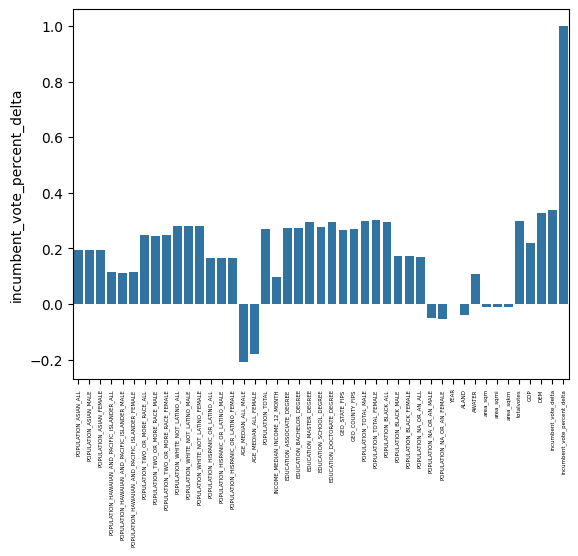

In [76]:
sns.barplot(cenesus_election_2012_corr.incumbent_vote_percent_delta)
fig_size = (20, 50)
plt.xticks(rotation=90, fontsize=4)
plt.show()

In [77]:
cenesus_election_2012_corr.incumbent_vote_delta

POPULATION_ASIAN_ALL                               0.723618
POPULATION_ASIAN_MALE                              0.722512
POPULATION_ASIAN_FEMALE                            0.724317
POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL       0.269724
POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE      0.260457
POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE    0.278895
POPULATION_TWO_OR_MORE_RACE_ALL                    0.673387
POPULATION_TWO_OR_MORE_RACE_MALE                   0.668595
POPULATION_TWO_OR_MORE_RACE_FEMALE                 0.677767
POPULATION_WHITE_NOT_LATINO_ALL                    0.559775
POPULATION_WHITE_NOT_LATINO_MALE                   0.561743
POPULATION_WHITE_NOT_LATINO_FEMALE                 0.557689
POPULATION_HISPANIC_OR_LATINO_ALL                  0.648351
POPULATION_HISPANIC_OR_LATINO_MALE                 0.648677
POPULATION_HISPANIC_OR_LATINO_FEMALE               0.647756
AGE_MEDIAN_ALL_MALE                               -0.077947
AGE_MEDIAN_ALL_FEMALE                   

In [78]:
for c in cenesus_election_2012_continuous:
    cenesus_election_2012_continuous[f'{c}_scaled'] = (cenesus_election_2012_continuous[c] - cenesus_election_2012_continuous[c].mean()) / cenesus_election_2012_continuous[c].std()

In [79]:
cenesus_election_2012_continuous_scaled = cenesus_election_2012_continuous.copy()

In [80]:
scaled_columns = [col for col in cenesus_election_2012_continuous_scaled.columns if 'scaled' in col]
census_election_2012_continuous_scaled = cenesus_election_2012_continuous_scaled[scaled_columns]

In [81]:
census_election_2012_continuous_scaled

,POPULATION_ASIAN_ALL_scaled,POPULATION_ASIAN_MALE_scaled,POPULATION_ASIAN_FEMALE_scaled,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL_scaled,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE_scaled,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE_scaled,POPULATION_TWO_OR_MORE_RACE_ALL_scaled,POPULATION_TWO_OR_MORE_RACE_MALE_scaled,POPULATION_TWO_OR_MORE_RACE_FEMALE_scaled,POPULATION_WHITE_NOT_LATINO_ALL_scaled,...,ALAND_scaled,AWATER_scaled,area_sqm_scaled,area_sqmi_scaled,area_sqkm_scaled,totalvotes_scaled,GOP_scaled,DEM_scaled,incumbent_vote_delta_scaled,incumbent_vote_percent_delta_scaled
0,-0.128058,-0.128432,-0.127668,-0.083489,-0.084238,-0.082672,-0.230576,-0.231915,-0.229127,-0.346459,...,-0.133915,-0.162347,-0.146581,-0.146582,-0.146581,-0.305733,-0.360547,-0.256685,-0.068541,-0.080482
1,-0.126217,-0.127549,-0.124964,-0.084548,-0.084238,-0.084800,-0.190696,-0.199369,-0.182027,-0.161016,...,-0.046471,-0.172281,-0.065280,-0.065280,-0.065279,-0.213354,-0.176526,-0.224866,-0.205590,-0.765183
2,-0.112686,-0.115488,-0.110115,-0.053316,-0.038967,-0.067777,-0.094204,-0.077976,-0.110177,-0.103015,...,-0.073964,-0.166299,-0.090486,-0.090486,-0.090486,-0.173351,-0.149170,-0.180638,-0.157461,-0.106337
3,-0.123287,-0.126902,-0.119979,-0.072902,-0.064235,-0.081608,-0.187256,-0.187959,-0.186460,-0.195174,...,-0.092077,-0.167673,-0.107754,-0.107753,-0.107754,-0.221774,-0.190216,-0.228948,-0.198369,-0.792104
4,-0.127639,-0.128255,-0.127032,-0.084548,-0.084238,-0.084800,-0.246658,-0.242951,-0.250184,-0.370303,...,-0.158777,-0.168394,-0.170799,-0.170798,-0.170798,-0.314393,-0.364564,-0.266715,-0.081739,-0.676764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,-0.128588,-0.128726,-0.128410,-0.072373,-0.084238,-0.060329,-0.210961,-0.204232,-0.217491,-0.431185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,-0.115755,-0.115958,-0.115524,-0.083489,-0.084238,-0.082672,-0.174149,-0.189456,-0.158939,-0.392518,...,0.498621,3.968912,0.964040,0.964040,0.964040,NaN,NaN,NaN,NaN,NaN
3218,-0.106186,-0.102955,-0.109055,-0.079254,-0.077921,-0.080544,-0.110565,-0.091069,-0.129756,-0.369758,...,1.056085,3.651342,1.450734,1.450733,1.450733,NaN,NaN,NaN,NaN,NaN
3219,-0.096785,-0.109192,-0.085563,0.022384,0.064208,-0.019899,0.328298,0.359713,0.297098,0.089976,...,6.627442,1.023585,6.382697,6.382696,6.382697,NaN,NaN,NaN,NaN,NaN


In [82]:
census_election_2012_continuous_scaled['incumbent_vote_delta'] = cenesus_election_2012_continuous['incumbent_vote_delta']
census_election_2012_continuous_scaled['incumbent_vote_percent_delta'] = cenesus_election_2012_continuous['incumbent_vote_percent_delta']

C:\Users\appar\AppData\Local\Temp\ipykernel_23572\2910710566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_election_2012_continuous_scaled['incumbent_vote_delta'] = cenesus_election_2012_continuous['incumbent_vote_delta']
C:\Users\appar\AppData\Local\Temp\ipykernel_23572\2910710566.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_election_2012_continuous_scaled['incumbent_vote_percent_delta'] = cenesus_election_2012_continuous['incumbent_vote_percent_delta']


In [83]:
census_election_2012_continuous_scaled

,POPULATION_ASIAN_ALL_scaled,POPULATION_ASIAN_MALE_scaled,POPULATION_ASIAN_FEMALE_scaled,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL_scaled,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE_scaled,POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE_scaled,POPULATION_TWO_OR_MORE_RACE_ALL_scaled,POPULATION_TWO_OR_MORE_RACE_MALE_scaled,POPULATION_TWO_OR_MORE_RACE_FEMALE_scaled,POPULATION_WHITE_NOT_LATINO_ALL_scaled,...,area_sqm_scaled,area_sqmi_scaled,area_sqkm_scaled,totalvotes_scaled,GOP_scaled,DEM_scaled,incumbent_vote_delta_scaled,incumbent_vote_percent_delta_scaled,incumbent_vote_delta,incumbent_vote_percent_delta
0,-0.128058,-0.128432,-0.127668,-0.083489,-0.084238,-0.082672,-0.230576,-0.231915,-0.229127,-0.346459,...,-0.146581,-0.146582,-0.146581,-0.305733,-0.360547,-0.256685,-0.068541,-0.080482,-1303.0,-0.234775
1,-0.126217,-0.127549,-0.124964,-0.084548,-0.084238,-0.084800,-0.190696,-0.199369,-0.182027,-0.161016,...,-0.065280,-0.065280,-0.065279,-0.213354,-0.176526,-0.224866,-0.205590,-0.765183,-7149.0,-0.437355
2,-0.112686,-0.115488,-0.110115,-0.053316,-0.038967,-0.067777,-0.094204,-0.077976,-0.110177,-0.103015,...,-0.090486,-0.090486,-0.090486,-0.173351,-0.149170,-0.180638,-0.157461,-0.106337,-5096.0,-0.242424
3,-0.123287,-0.126902,-0.119979,-0.072902,-0.064235,-0.081608,-0.187256,-0.187959,-0.186460,-0.195174,...,-0.107754,-0.107753,-0.107754,-0.221774,-0.190216,-0.228948,-0.198369,-0.792104,-6841.0,-0.445320
4,-0.127639,-0.128255,-0.127032,-0.084548,-0.084238,-0.084800,-0.246658,-0.242951,-0.250184,-0.370303,...,-0.170799,-0.170798,-0.170798,-0.314393,-0.364564,-0.266715,-0.081739,-0.676764,-1866.0,-0.411194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3216,-0.128588,-0.128726,-0.128410,-0.072373,-0.084238,-0.060329,-0.210961,-0.204232,-0.217491,-0.431185,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,-0.115755,-0.115958,-0.115524,-0.083489,-0.084238,-0.082672,-0.174149,-0.189456,-0.158939,-0.392518,...,0.964040,0.964040,0.964040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,-0.106186,-0.102955,-0.109055,-0.079254,-0.077921,-0.080544,-0.110565,-0.091069,-0.129756,-0.369758,...,1.450734,1.450733,1.450733,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,-0.096785,-0.109192,-0.085563,0.022384,0.064208,-0.019899,0.328298,0.359713,0.297098,0.089976,...,6.382697,6.382696,6.382697,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
census_election_2012_continuous_scaled_corr = census_election_2012_continuous_scaled.corr()

In [85]:
census_election_2012_continuous_scaled_corr.incumbent_vote_delta.sort_values(ascending=False)

incumbent_vote_delta                                      1.000000
incumbent_vote_delta_scaled                               1.000000
DEM_scaled                                                0.840863
EDUCATION_SCHOOL_DEGREE_scaled                            0.774056
POPULATION_BLACK_ALL_scaled                               0.749187
POPULATION_TOTAL_MALE_scaled                              0.749050
POPULATION_TOTAL_FEMALE_scaled                            0.748296
EDUCATION_MASTER_DEGREE_scaled                            0.736047
EDUCATION_DOCTORATE_DEGREE_scaled                         0.729635
EDUCATION_BACHELOR_DEGREE_scaled                          0.728842
GEO_COUNTY_FIPS_scaled                                    0.725631
POPULATION_ASIAN_FEMALE_scaled                            0.724317
POPULATION_ASIAN_ALL_scaled                               0.723618
POPULATION_ASIAN_MALE_scaled                              0.722512
POPULATION_TOTAL_scaled                                   0.72

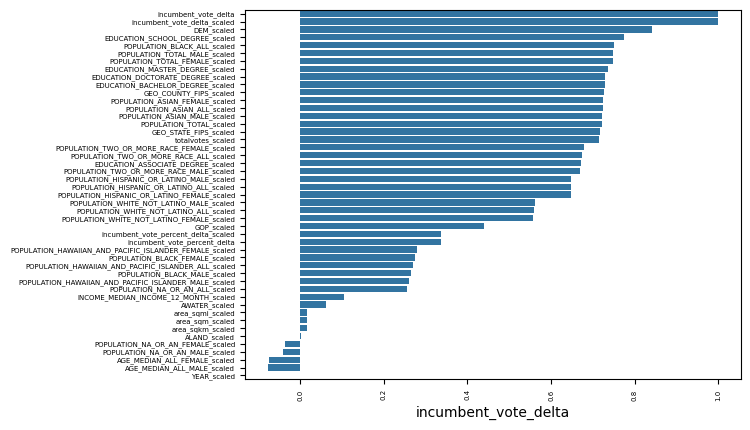

In [86]:
sns.barplot(census_election_2012_continuous_scaled_corr.incumbent_vote_delta.sort_values(ascending=False), orient='h')
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize = 5)
fig_size = (40, 20)
plt.show()

<Axes: >

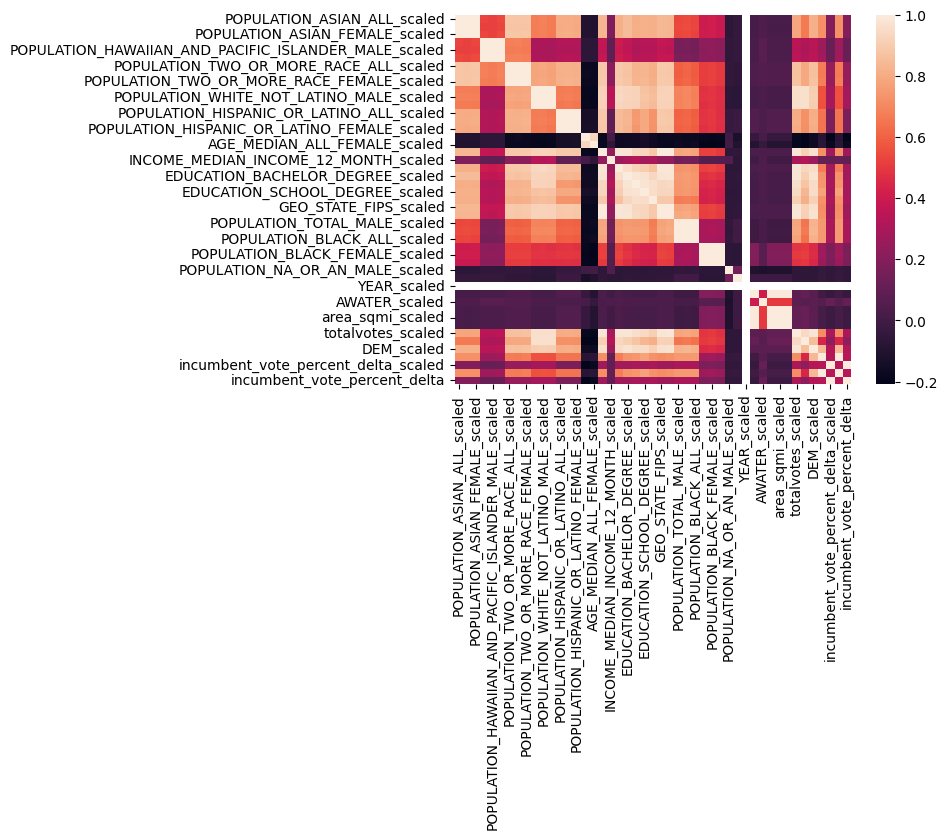

In [87]:
sns.heatmap(census_election_2012_continuous_scaled_corr)

In [88]:
census_election_2012_continuous_scaled_corr.incumbent_vote_delta.loc[census_election_2012_continuous_scaled_corr.incumbent_vote_delta_scaled.abs() > .5]

POPULATION_ASIAN_ALL_scaled                    0.723618
POPULATION_ASIAN_MALE_scaled                   0.722512
POPULATION_ASIAN_FEMALE_scaled                 0.724317
POPULATION_TWO_OR_MORE_RACE_ALL_scaled         0.673387
POPULATION_TWO_OR_MORE_RACE_MALE_scaled        0.668595
POPULATION_TWO_OR_MORE_RACE_FEMALE_scaled      0.677767
POPULATION_WHITE_NOT_LATINO_ALL_scaled         0.559775
POPULATION_WHITE_NOT_LATINO_MALE_scaled        0.561743
POPULATION_WHITE_NOT_LATINO_FEMALE_scaled      0.557689
POPULATION_HISPANIC_OR_LATINO_ALL_scaled       0.648351
POPULATION_HISPANIC_OR_LATINO_MALE_scaled      0.648677
POPULATION_HISPANIC_OR_LATINO_FEMALE_scaled    0.647756
POPULATION_TOTAL_scaled                        0.721062
EDUCATION_ASSOCIATE_DEGREE_scaled              0.671611
EDUCATION_BACHELOR_DEGREE_scaled               0.728842
EDUCATION_MASTER_DEGREE_scaled                 0.736047
EDUCATION_SCHOOL_DEGREE_scaled                 0.774056
EDUCATION_DOCTORATE_DEGREE_scaled              0

<Axes: xlabel='POPULATION_WHITE_NOT_LATINO_ALL', ylabel='incumbent_vote_delta'>

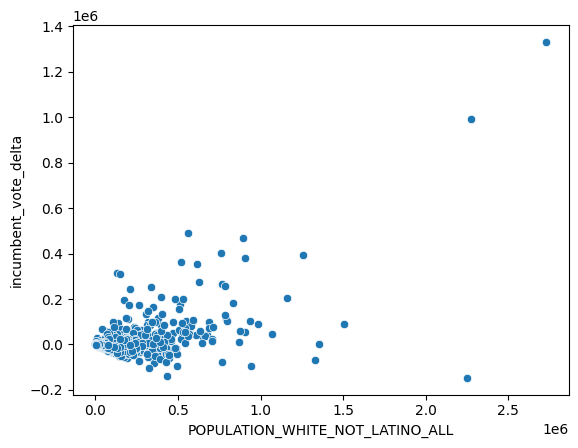

In [89]:
sns.scatterplot(x='POPULATION_WHITE_NOT_LATINO_ALL', y='incumbent_vote_delta', data=cenesus_election_2012_continuous)

In [91]:
cenesus_election_2012_continuous.columns

Index(['POPULATION_ASIAN_ALL', 'POPULATION_ASIAN_MALE',
       'POPULATION_ASIAN_FEMALE',
       'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL',
       'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE',
       'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE',
       'POPULATION_TWO_OR_MORE_RACE_ALL', 'POPULATION_TWO_OR_MORE_RACE_MALE',
       'POPULATION_TWO_OR_MORE_RACE_FEMALE', 'POPULATION_WHITE_NOT_LATINO_ALL',
       'POPULATION_WHITE_NOT_LATINO_MALE',
       'POPULATION_WHITE_NOT_LATINO_FEMALE',
       'POPULATION_HISPANIC_OR_LATINO_ALL',
       'POPULATION_HISPANIC_OR_LATINO_MALE',
       'POPULATION_HISPANIC_OR_LATINO_FEMALE', 'AGE_MEDIAN_ALL_MALE',
       'AGE_MEDIAN_ALL_FEMALE', 'POPULATION_TOTAL',
       'INCOME_MEDIAN_INCOME_12_MONTH', 'EDUCATION_ASSOCIATE_DEGREE',
       'EDUCATION_BACHELOR_DEGREE', 'EDUCATION_MASTER_DEGREE',
       'EDUCATION_SCHOOL_DEGREE', 'EDUCATION_DOCTORATE_DEGREE',
       'GEO_STATE_FIPS', 'GEO_COUNTY_FIPS', 'POPULATION_TOTAL_MALE',
       'POPULATION

In [92]:
cenesus_election_2012_dimension = ceneus_election_2012_df.loc[:,dimensions]
cenesus_election_2012_continuous = ceneus_election_2012_df.loc[:,continious]

In [94]:
cenesus_election_2012_continuous.columns

Index(['POPULATION_ASIAN_ALL', 'POPULATION_ASIAN_MALE',
       'POPULATION_ASIAN_FEMALE',
       'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL',
       'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_MALE',
       'POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_FEMALE',
       'POPULATION_TWO_OR_MORE_RACE_ALL', 'POPULATION_TWO_OR_MORE_RACE_MALE',
       'POPULATION_TWO_OR_MORE_RACE_FEMALE', 'POPULATION_WHITE_NOT_LATINO_ALL',
       'POPULATION_WHITE_NOT_LATINO_MALE',
       'POPULATION_WHITE_NOT_LATINO_FEMALE',
       'POPULATION_HISPANIC_OR_LATINO_ALL',
       'POPULATION_HISPANIC_OR_LATINO_MALE',
       'POPULATION_HISPANIC_OR_LATINO_FEMALE', 'AGE_MEDIAN_ALL_MALE',
       'AGE_MEDIAN_ALL_FEMALE', 'POPULATION_TOTAL',
       'INCOME_MEDIAN_INCOME_12_MONTH', 'EDUCATION_ASSOCIATE_DEGREE',
       'EDUCATION_BACHELOR_DEGREE', 'EDUCATION_MASTER_DEGREE',
       'EDUCATION_SCHOOL_DEGREE', 'EDUCATION_DOCTORATE_DEGREE',
       'GEO_STATE_FIPS', 'GEO_COUNTY_FIPS', 'POPULATION_TOTAL_MALE',
       'POPULATION

In [95]:
census_ratios_df = pd.DataFrame()

In [96]:
census_ratios_df['POPULATION_PERCENT_BLACK']  = ceneus_election_2012_df.POPULATION_BLACK_ALL / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_BLACK_MALE']  = ceneus_election_2012_df.POPULATION_BLACK_MALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_BLACK_FEMALE']  = ceneus_election_2012_df.POPULATION_BLACK_FEMALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_WHITE']  = ceneus_election_2012_df.POPULATION_WHITE_NOT_LATINO_ALL / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_WHITE_MALE']  = ceneus_election_2012_df.POPULATION_WHITE_NOT_LATINO_MALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_WHITE_FEMALE']  = ceneus_election_2012_df.POPULATION_WHITE_NOT_LATINO_FEMALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_ASIAN']  = ceneus_election_2012_df.POPULATION_ASIAN_ALL / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_ASIAN_MALE']  = ceneus_election_2012_df.POPULATION_ASIAN_MALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_ASIAN_FEMALE']  = ceneus_election_2012_df.POPULATION_ASIAN_FEMALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_HAWAIIAN']  = ceneus_election_2012_df.POPULATION_HAWAIIAN_AND_PACIFIC_ISLANDER_ALL / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_TWO_OR_MORE']  = ceneus_election_2012_df.POPULATION_TWO_OR_MORE_RACE_ALL / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_HISPANIC']  = ceneus_election_2012_df.POPULATION_HISPANIC_OR_LATINO_ALL / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_HISPANIC_MALE']  = ceneus_election_2012_df.POPULATION_HISPANIC_OR_LATINO_MALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_HISPANIC_FEMALE']  = ceneus_election_2012_df.POPULATION_HISPANIC_OR_LATINO_FEMALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_FEMALE']  = ceneus_election_2012_df.POPULATION_TOTAL_FEMALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_MALE']  = ceneus_election_2012_df.POPULATION_TOTAL_MALE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION PERCENT_NA_OR_AN']  = ceneus_election_2012_df.POPULATION_NA_OR_AN_ALL / ceneus_election_2012_df.POPULATION_TOTAL

census_ratios_df['POPULATION_PERCENT_HS']  = ceneus_election_2012_df.EDUCATION_SCHOOL_DEGREE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_ASSOCIATE']  = ceneus_election_2012_df.EDUCATION_ASSOCIATE_DEGREE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_BACHELORS']  = ceneus_election_2012_df.EDUCATION_BACHELOR_DEGREE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION_PERCENT_MASTERS']  = ceneus_election_2012_df.EDUCATION_MASTER_DEGREE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION PERCENT_DOCTORATE']  = ceneus_election_2012_df.EDUCATION_DOCTORATE_DEGREE / ceneus_election_2012_df.POPULATION_TOTAL
census_ratios_df['POPULATION PERCENT_DEGREE'] = (ceneus_election_2012_df.EDUCATION_ASSOCIATE_DEGREE + ceneus_election_2012_df.EDUCATION_BACHELOR_DEGREE + ceneus_election_2012_df.EDUCATION_MASTER_DEGREE + ceneus_election_2012_df.EDUCATION_DOCTORATE_DEGREE) / ceneus_election_2012_df.POPULATION_TOTAL


In [97]:
census_ratios_df['incumbent_vote_percent_delta'] = ceneus_election_2012_df.incumbent_vote_percent_delta

In [98]:
census_ratios_df


,POPULATION_PERCENT_BLACK,POPULATION_PERCENT_BLACK_MALE,POPULATION_PERCENT_BLACK_FEMALE,POPULATION_PERCENT_WHITE,POPULATION_PERCENT_WHITE_MALE,POPULATION_PERCENT_WHITE_FEMALE,POPULATION_PERCENT_ASIAN,POPULATION_PERCENT_ASIAN_MALE,POPULATION_PERCENT_ASIAN_FEMALE,POPULATION_PERCENT_HAWAIIAN,...,POPULATION_PERCENT_FEMALE,POPULATION_PERCENT_MALE,POPULATION PERCENT_NA_OR_AN,POPULATION_PERCENT_HS,POPULATION_PERCENT_ASSOCIATE,POPULATION_PERCENT_BACHELORS,POPULATION_PERCENT_MASTERS,POPULATION PERCENT_DOCTORATE,POPULATION PERCENT_DEGREE,incumbent_vote_percent_delta
0,0.003237,0.001421,0.000710,0.963135,0.462741,0.500395,0.002131,0.000710,0.001421,0.000158,...,0.002684,0.005920,0.000710,0.013578,0.033312,0.051705,0.024313,0.001579,0.110909,-0.234775
1,0.001190,0.009373,0.005133,0.952046,0.460997,0.491049,0.002306,0.000595,0.001711,0.000000,...,0.002182,0.003372,0.004240,0.008902,0.035929,0.057401,0.038582,0.003471,0.135383,-0.437355
2,0.021600,0.004588,0.002285,0.879635,0.444698,0.434937,0.010913,0.004324,0.006589,0.001114,...,0.023223,0.044823,0.002303,0.006325,0.050827,0.084793,0.039876,0.009554,0.185050,-0.242424
3,0.001352,0.003549,0.002450,0.945476,0.464415,0.481060,0.005576,0.000986,0.004591,0.000620,...,0.005238,0.006590,0.001098,0.003323,0.029938,0.061256,0.022897,0.002394,0.116484,-0.445320
4,0.005470,0.004814,0.001532,0.966411,0.485558,0.480853,0.004595,0.001313,0.003282,0.000000,...,0.002845,0.008315,0.003282,0.008972,0.051094,0.075930,0.029540,0.000000,0.156565,-0.411194


In [99]:
from pandas.plotting import scatter_matrix

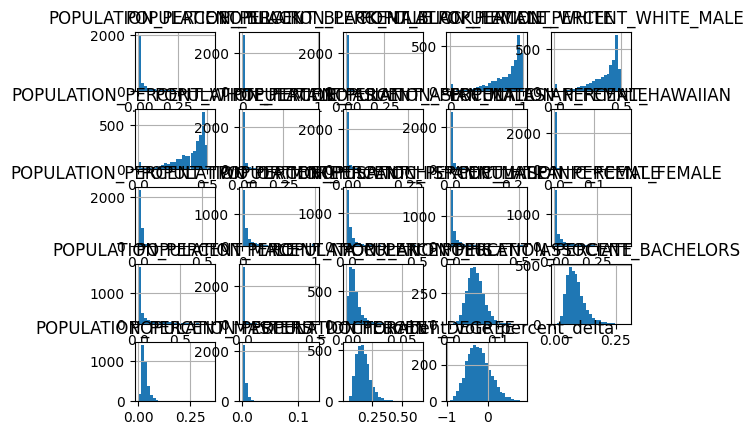

In [109]:
census_ratios_df.hist(bins=25)
fig_size = (30, 20)
plt.xticks(rotation=90, fontsize=4)
plt.yticks(fontsize=4)
plt.show()


<Axes: >

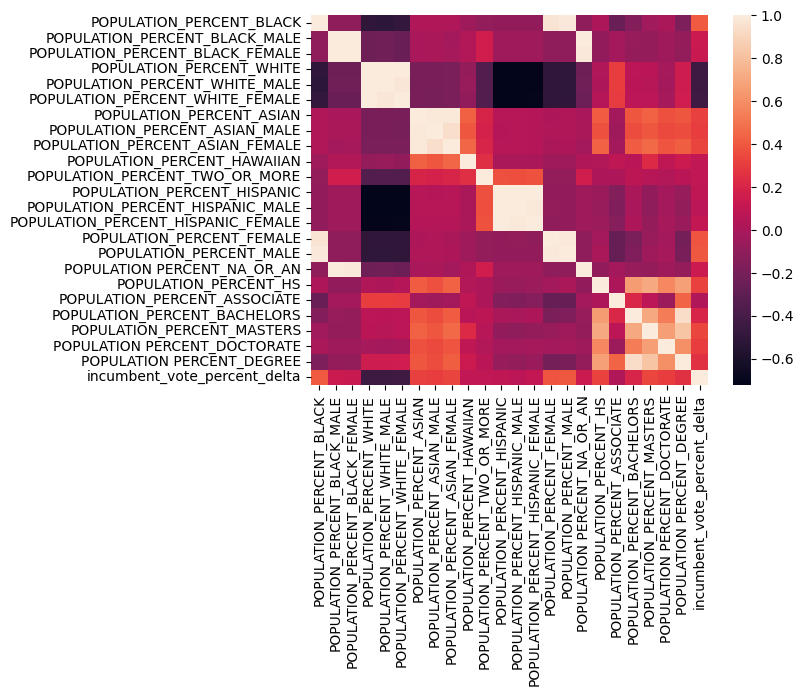

In [114]:
census_ratios_df_corr = census_ratios_df.corr()
p_values = pd.DataFrame(index=census_ratios_df_corr.columns, columns=census_ratios_df_corr.columns)
for col1 in census_ratios_df_corr.columns:
    for col2 in census_ratios_df_corr.columns:
        if col1 != col2:
            corr, p_value = pearsonr(census_ratios_df_corr[col1], census_ratios_df_corr[col2])
            p_values.loc[col1, col2] = p_value
            
sns.heatmap(census_ratios_df_corr)

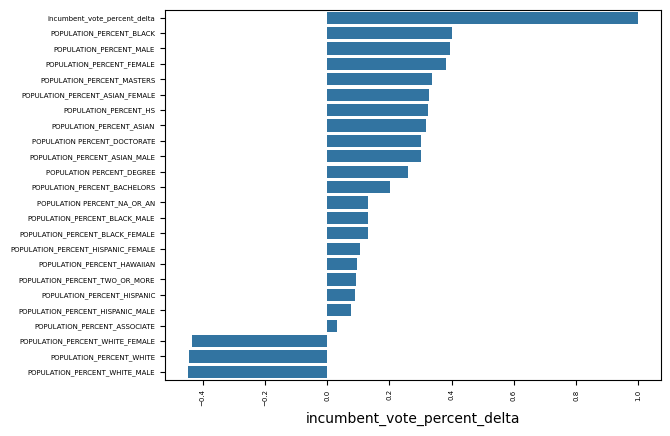

In [112]:
sns.barplot(census_ratios_df_corr.incumbent_vote_percent_delta.sort_values(ascending=False), orient='h')
plt.xticks(rotation=90, fontsize=5)
plt.yticks(fontsize = 5)
fig_size = (40, 20)
plt.show()

In [115]:
print("Correlation Matrix:")
print(census_ratios_df_corr)
print("\nP-values:")
print(p_values)

Correlation Matrix:
                                    POPULATION_PERCENT_BLACK  \
POPULATION_PERCENT_BLACK                            1.000000   
POPULATION_PERCENT_BLACK_MALE                      -0.099717   
POPULATION_PERCENT_BLACK_FEMALE                    -0.100683   
POPULATION_PERCENT_WHITE                           -0.505874   
POPULATION_PERCENT_WHITE_MALE                      -0.514603   
POPULATION_PERCENT_WHITE_FEMALE                    -0.491251   
POPULATION_PERCENT_ASIAN                            0.022524   
POPULATION_PERCENT_ASIAN_MALE                       0.024633   
POPULATION_PERCENT_ASIAN_FEMALE                     0.019711   
POPULATION_PERCENT_HAWAIIAN                        -0.041567   
POPULATION_PERCENT_TWO_OR_MORE                     -0.085969   
POPULATION_PERCENT_HISPANIC                        -0.093732   
POPULATION_PERCENT_HISPANIC_MALE                   -0.093271   
POPULATION_PERCENT_HISPANIC_FEMALE                 -0.093457   
POPULATION_PERCENT_F

In [116]:
p_values.head()

,POPULATION_PERCENT_BLACK,POPULATION_PERCENT_BLACK_MALE,POPULATION_PERCENT_BLACK_FEMALE,POPULATION_PERCENT_WHITE,POPULATION_PERCENT_WHITE_MALE,POPULATION_PERCENT_WHITE_FEMALE,POPULATION_PERCENT_ASIAN,POPULATION_PERCENT_ASIAN_MALE,POPULATION_PERCENT_ASIAN_FEMALE,POPULATION_PERCENT_HAWAIIAN,...,POPULATION_PERCENT_FEMALE,POPULATION_PERCENT_MALE,POPULATION PERCENT_NA_OR_AN,POPULATION_PERCENT_HS,POPULATION_PERCENT_ASSOCIATE,POPULATION_PERCENT_BACHELORS,POPULATION_PERCENT_MASTERS,POPULATION PERCENT_DOCTORATE,POPULATION PERCENT_DEGREE,incumbent_vote_percent_delta
POPULATION_PERCENT_BLACK,NaN,0.799939,0.802123,0.001564,0.001391,0.00176,0.750186,0.713495,0.787815,0.775885,...,0.0,0.0,0.79779,0.768985,0.001987,0.157021,0.507562,0.811699,0.097467,0.000297
POPULATION_PERCENT_BLACK_MALE,0.799939,NaN,0.0,0.191399,0.20987,0.174563,0.56948,0.620911,0.520913,0.975384,...,0.824327,0.811609,0.0,0.121118,0.482749,0.158184,0.137254,0.246833,0.13929,0.564883
POPULATION_PERCENT_BLACK_FEMALE,0.802123,0.0,NaN,0.186548,0.204733,0.169988,0.576937,0.628965,0.52776,0.983167,...,0.826856,0.813959,0.0,0.120449,0.472683,0.156852,0.136429,0.246493,0.137337,0.561978
POPULATION_PERCENT_WHITE,0.001564,0.191399,0.186548,NaN,0.0,0.0,0.301087,0.2733,0.331539,0.600151,...,0.001446,0.001502,0.196283,0.462722,0.000272,0.242334,0.297421,0.72006,0.083897,0.000282
POPULATION_PERCENT_WHITE_MALE,0.001391,0.20987,0.204733,0.0,NaN,0.0,0.296285,0.269403,0.325759,0.616563,...,0.001298,0.001341,0.215036,0.491442,0.000255,0.255163,0.315067,0.747128,0.089551,0.000245


In [118]:
census_ratios_df_corr['incumbent_vote_percent_delta_p_value'] = p_values['incumbent_vote_percent_delta']

In [121]:
census_ratios_df_corr_sig = census_ratios_df_corr.loc[census_ratios_df_corr.incumbent_vote_percent_delta_p_value >= .05]

In [122]:
census_ratios_df_corr_sig

,POPULATION_PERCENT_BLACK,POPULATION_PERCENT_BLACK_MALE,POPULATION_PERCENT_BLACK_FEMALE,POPULATION_PERCENT_WHITE,POPULATION_PERCENT_WHITE_MALE,POPULATION_PERCENT_WHITE_FEMALE,POPULATION_PERCENT_ASIAN,POPULATION_PERCENT_ASIAN_MALE,POPULATION_PERCENT_ASIAN_FEMALE,POPULATION_PERCENT_HAWAIIAN,...,POPULATION_PERCENT_MALE,POPULATION PERCENT_NA_OR_AN,POPULATION_PERCENT_HS,POPULATION_PERCENT_ASSOCIATE,POPULATION_PERCENT_BACHELORS,POPULATION_PERCENT_MASTERS,POPULATION PERCENT_DOCTORATE,POPULATION PERCENT_DEGREE,incumbent_vote_percent_delta,incumbent_vote_percent_delta_p_value
POPULATION_PERCENT_BLACK_MALE,-0.099717,1.000000,0.997918,-0.243037,-0.228564,-0.254254,-0.006626,0.003411,-0.016663,0.032273,...,-0.101159,0.997982,-0.095025,-0.021858,-0.075986,-0.082903,-0.037788,-0.081319,0.132250,0.564883
POPULATION_PERCENT_BLACK_FEMALE,-0.100683,0.997918,1.000000,-0.244420,-0.229047,-0.256501,-0.004431,0.006570,-0.015515,0.033907,...,-0.101539,0.991810,-0.095900,-0.026368,-0.077410,-0.082922,-0.038501,-0.083557,0.131205,0.561978
POPULATION_PERCENT_HAWAIIAN,-0.041567,0.032273,0.033907,-0.082421,-0.068771,-0.094770,0.424134,0.393284,0.443089,1.000000,...,-0.041401,0.030533,0.037839,0.089090,0.059040,0.224595,0.086606,0.138681,0.096579,0.347798
POPULATION_PERCENT_TWO_OR_MORE,-0.085969,0.162618,0.162640,-0.353328,-0.346825,-0.355429,0.194279,0.179784,0.203332,0.253091,...,-0.086416,0.161934,0.013670,0.012827,0.079140,0.053241,0.034896,0.071193,0.093799,0.174715
POPULATION_PERCENT_HISPANIC,-0.093732,-0.043931,-0.041440,-0.721226,-0.718155,-0.715541,0.052253,0.050604,0.052395,0.000118,...,-0.093566,-0.046205,-0.062536,-0.152956,0.004957,-0.090420,-0.020332,-0.071052,0.090956,0.106091
POPULATION_PERCENT_HISPANIC_MALE,-0.093271,-0.042755,-0.038821,-0.722159,-0.717060,-0.718444,0.056163,0.056911,0.053747,0.000941,...,-0.090021,-0.046454,-0.068863,-0.165197,-0.005959,-0.097578,-0.025316,-0.083863,0.077019,0.107933
POPULATION_PERCENT_HISPANIC_FEMALE,-0.093457,-0.044746,-0.043693,-0.714709,-0.713655,-0.707132,0.048003,0.044011,0.050659,-0.000691,...,-0.096324,-0.045601,-0.055831,-0.139735,0.015649,-0.082682,-0.015276,-0.057907,0.104384,0.104246
POPULATION PERCENT_NA_OR_AN,-0.098359,0.997982,0.991810,-0.240686,-0.227159,-0.251008,-0.008760,0.000288,-0.017725,0.030533,...,-0.100375,1.000000,-0.093778,-0.017329,-0.074275,-0.082546,-0.036932,-0.078785,0.132728,0.56778
POPULATION_PERCENT_HS,0.015879,-0.095025,-0.095900,0.029971,0.011226,0.047931,0.409115,0.372515,0.434375,0.037839,...,-0.002142,-0.093778,1.000000,0.015070,0.652383,0.710183,0.571348,0.669913,0.325228,0.076727
POPULATION_PERCENT_ASSOCIATE,-0.256186,-0.021858,-0.026368,0.303798,0.306914,0.297094,-0.029190,-0.040181,-0.017127,0.089090,...,-0.265312,-0.017329,0.015070,1.000000,0.218539,0.073352,-0.053263,0.439764,0.030259,0.052919


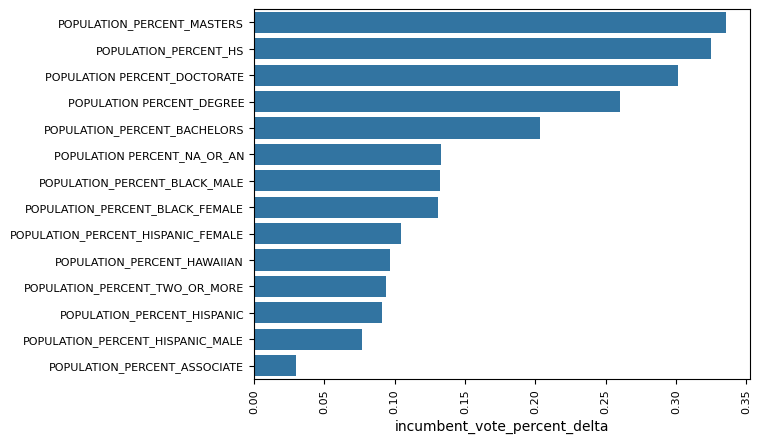

In [124]:
sns.barplot(census_ratios_df_corr_sig.incumbent_vote_percent_delta.sort_values(ascending=False), orient='h')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize = 8)
fig_size = (40, 20)
plt.show()

In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [128]:
census_ratios_pca_df = census_ratios_df.copy()
census_ratios_pca_df_y = census_ratios_pca_df.pop('incumbent_vote_percent_delta')

In [131]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(census_ratios_pca_df)

In [132]:
X_scaled

array([[-0.54162544, -0.22706842, -0.22858531, ..., -0.44280134,
        -0.5853074 , -1.10825769],
       [-0.56869356, -0.11946635, -0.1082119 , ...,  0.33461206,
        -0.23152965, -0.69652163],
       [-0.29872407, -0.18421149, -0.18573743, ...,  0.40513931,
         0.90542709,  0.13905862],
       ...,
       [-0.53847004,  1.57862598,  1.48088769, ...,  0.06141304,
        -0.45197658,  0.52490784],
       [-0.52564317,  0.40106398,  0.38718121, ..., -0.13574708,
         0.03832199,  0.09507776],
       [-0.56278323,  9.11550802,  9.28778994, ..., -0.41848286,
        -0.38317426, -0.9465078 ]])

In [133]:
pca = PCA()

In [134]:
pca.fit(X_scaled)

PCA()

In [135]:
components = pca.components_

In [136]:
X_pca = pca.transform(X_scaled)

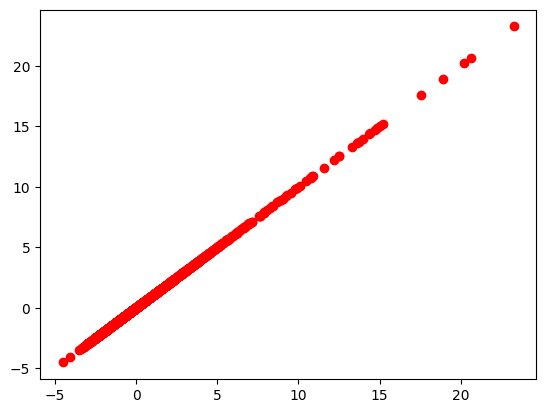

In [138]:
plt.scatter(X_pca[:, 1], X_pca[:, 1], c='r', label='PCA Transformed Data')

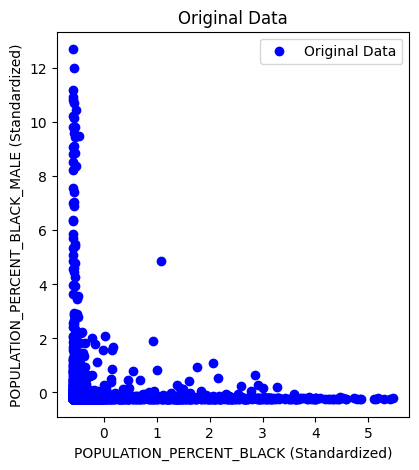

In [141]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='b', label='Original Data')
plt.xlabel('POPULATION_PERCENT_BLACK (Standardized)')
plt.ylabel('POPULATION_PERCENT_BLACK_MALE (Standardized)')
plt.title('Original Data')
plt.legend()

In [140]:
census_ratios_pca_df.columns

Index(['POPULATION_PERCENT_BLACK', 'POPULATION_PERCENT_BLACK_MALE',
       'POPULATION_PERCENT_BLACK_FEMALE', 'POPULATION_PERCENT_WHITE',
       'POPULATION_PERCENT_WHITE_MALE', 'POPULATION_PERCENT_WHITE_FEMALE',
       'POPULATION_PERCENT_ASIAN', 'POPULATION_PERCENT_ASIAN_MALE',
       'POPULATION_PERCENT_ASIAN_FEMALE', 'POPULATION_PERCENT_HAWAIIAN',
       'POPULATION_PERCENT_TWO_OR_MORE', 'POPULATION_PERCENT_HISPANIC',
       'POPULATION_PERCENT_HISPANIC_MALE',
       'POPULATION_PERCENT_HISPANIC_FEMALE', 'POPULATION_PERCENT_FEMALE',
       'POPULATION_PERCENT_MALE', 'POPULATION PERCENT_NA_OR_AN',
       'POPULATION_PERCENT_HS', 'POPULATION_PERCENT_ASSOCIATE',
       'POPULATION_PERCENT_BACHELORS', 'POPULATION_PERCENT_MASTERS',
       'POPULATION PERCENT_DOCTORATE', 'POPULATION PERCENT_DEGREE'],
      dtype='object')

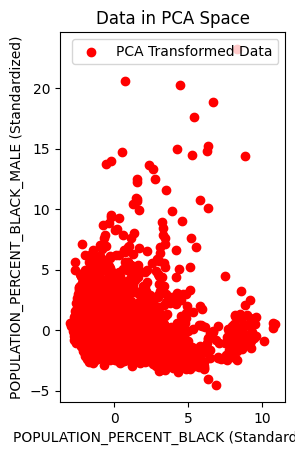

In [142]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='r', label='PCA Transformed Data')
plt.xlabel('POPULATION_PERCENT_BLACK (Standardized)')
plt.ylabel('POPULATION_PERCENT_BLACK_MALE (Standardized)')
plt.title('Data in PCA Space')
plt.legend()

In [143]:
components

array([[ 1.87568785e-01,  8.32153504e-02,  8.40426318e-02,
        -4.07239164e-01, -4.04635675e-01, -4.04878974e-01,
         8.75851028e-02,  8.88494107e-02,  8.37166857e-02,
         3.96784307e-02,  1.64801494e-01,  3.13107197e-01,
         3.13691222e-01,  3.10102053e-01,  1.89241617e-01,
         1.89990976e-01,  8.20623821e-02, -2.86902313e-02,
        -1.46611126e-01, -5.05532596e-02, -4.62694872e-02,
        -6.07019467e-03, -8.78942949e-02],
       [-5.81501117e-02, -4.43245490e-02, -4.41602358e-02,
        -8.37327776e-03, -1.03459054e-02, -6.34448986e-03,
         3.50358696e-01,  3.34244563e-01,  3.56466016e-01,
         1.60416723e-01,  8.51495331e-02,  1.57074947e-02,
         1.31271522e-02,  1.81220689e-02, -7.09392593e-02,
        -6.48439769e-02, -4.43060337e-02,  3.25053383e-01,
         6.76566359e-02,  3.49691797e-01,  3.58911185e-01,
         2.97697193e-01,  3.68854719e-01],
       [-4.38473513e-01,  2.75229464e-01,  2.75110760e-01,
         1.75201838e-02,  2.3

In [145]:
X_pca = pd.DataFrame(X_pca, columns=census_ratios_pca_df.columns)

In [147]:
X_pca.head()
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

In [148]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X_pca.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
POPULATION_PERCENT_BLACK,0.187569,-0.058150,-0.438474,0.141254,-0.089698,0.120151,-0.005953,-0.024622,-0.004073,-0.008151,...,0.384808,-0.010687,0.142559,0.228386,3.988133e-01,6.528127e-02,-1.160582e-01,1.957939e-03,7.046795e-02,1.846176e-02
POPULATION_PERCENT_BLACK_MALE,0.083215,-0.044325,0.275229,0.468810,-0.095888,-0.025954,-0.035712,0.029465,-0.013010,0.005317,...,-0.011717,-0.029362,0.082479,0.099075,4.992606e-02,-6.535702e-01,-2.389292e-01,4.052291e-01,-5.319929e-02,-1.093901e-01
POPULATION_PERCENT_BLACK_FEMALE,0.084043,-0.044160,0.275111,0.467444,-0.093207,-0.029454,-0.034429,0.030949,-0.015162,0.002862,...,0.105290,0.157695,0.622775,-0.306208,-2.481945e-02,3.249056e-01,1.187775e-01,-2.014492e-01,2.644665e-02,5.438047e-02
POPULATION_PERCENT_WHITE,-0.407239,-0.008373,0.017520,-0.034898,0.061915,-0.042414,0.043252,-0.046125,0.003378,-0.004562,...,-0.022806,-0.087461,0.254728,0.292837,2.299060e-02,-2.950981e-01,-8.751557e-02,-3.801696e-01,-1.559624e-01,6.322918e-01
POPULATION_PERCENT_WHITE_MALE,-0.404636,-0.010346,0.023746,-0.028962,0.069552,-0.032805,0.044349,-0.036591,0.012010,-0.036493,...,0.532972,-0.333728,0.196015,0.304175,-1.143325e-02,1.467526e-01,4.352157e-02,1.890587e-01,7.756023e-02,-3.144393e-01
POPULATION_PERCENT_WHITE_FEMALE,-0.404879,-0.006344,0.011224,-0.040278,0.053705,-0.051294,0.041660,-0.054888,-0.005099,0.026702,...,-0.565719,0.154280,0.309044,0.278229,-1.169825e-02,1.501540e-01,4.453031e-02,1.934407e-01,7.935792e-02,-3.217273e-01
POPULATION_PERCENT_ASIAN,0.087585,0.350359,-0.040528,0.088921,0.367476,-0.094873,-0.201720,-0.096544,0.041245,-0.011407,...,-0.001889,-0.015052,0.031759,0.035823,1.548803e-02,-2.777063e-01,2.960972e-01,-1.981298e-01,6.738110e-01,-4.211236e-02
POPULATION_PERCENT_ASIAN_MALE,0.088849,0.334245,-0.039879,0.092952,0.375594,-0.110752,-0.232162,-0.114117,0.059253,-0.038845,...,-0.008480,-0.054751,0.002119,0.019517,-7.934029e-03,1.422601e-01,-1.516812e-01,1.014956e-01,-3.451721e-01,2.157283e-02
POPULATION_PERCENT_ASIAN_FEMALE,0.083717,0.356466,-0.039995,0.082193,0.348377,-0.075893,-0.164746,-0.075787,0.021673,0.016898,...,0.004885,0.025860,0.061038,0.051390,-7.783241e-03,1.395564e-01,-1.487985e-01,9.956666e-02,-3.386120e-01,2.116283e-02
POPULATION_PERCENT_HAWAIIAN,0.039678,0.160417,0.026870,0.071416,0.380035,0.349995,0.485802,0.612438,-0.167272,0.029217,...,-0.019996,-0.006428,0.027709,0.032339,6.862589e-17,-1.167800e-16,7.011120e-17,-4.848754e-17,-1.490686e-16,-2.702849e-17


In [149]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [167]:
import geopandas as gpd

url = "https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_20m.zip"
us_counties = gpd.read_file(url)
us_counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,01,061,00161556,0500000US01061,01061,Geneva,Geneva County,AL,Alabama,06,1487908432,11567409,"POLYGON ((-86.19348 31.19221, -86.12541 31.182..."
1,08,125,00198178,0500000US08125,08125,Yuma,Yuma County,CO,Colorado,06,6123763559,11134665,"POLYGON ((-102.80377 40.00255, -102.79358 40.3..."
2,17,177,01785076,0500000US17177,17177,Stephenson,Stephenson County,IL,Illinois,06,1461392061,1350223,"POLYGON ((-89.92647 42.50579, -89.83759 42.504..."
3,28,153,00695797,0500000US28153,28153,Wayne,Wayne County,MS,Mississippi,06,2099745602,7255476,"POLYGON ((-88.94335 31.82456, -88.91046 31.826..."
4,34,041,00882237,0500000US34041,34041,Warren,Warren County,NJ,New Jersey,06,923435921,15822933,"POLYGON ((-75.19261 40.71587, -75.17748 40.764..."


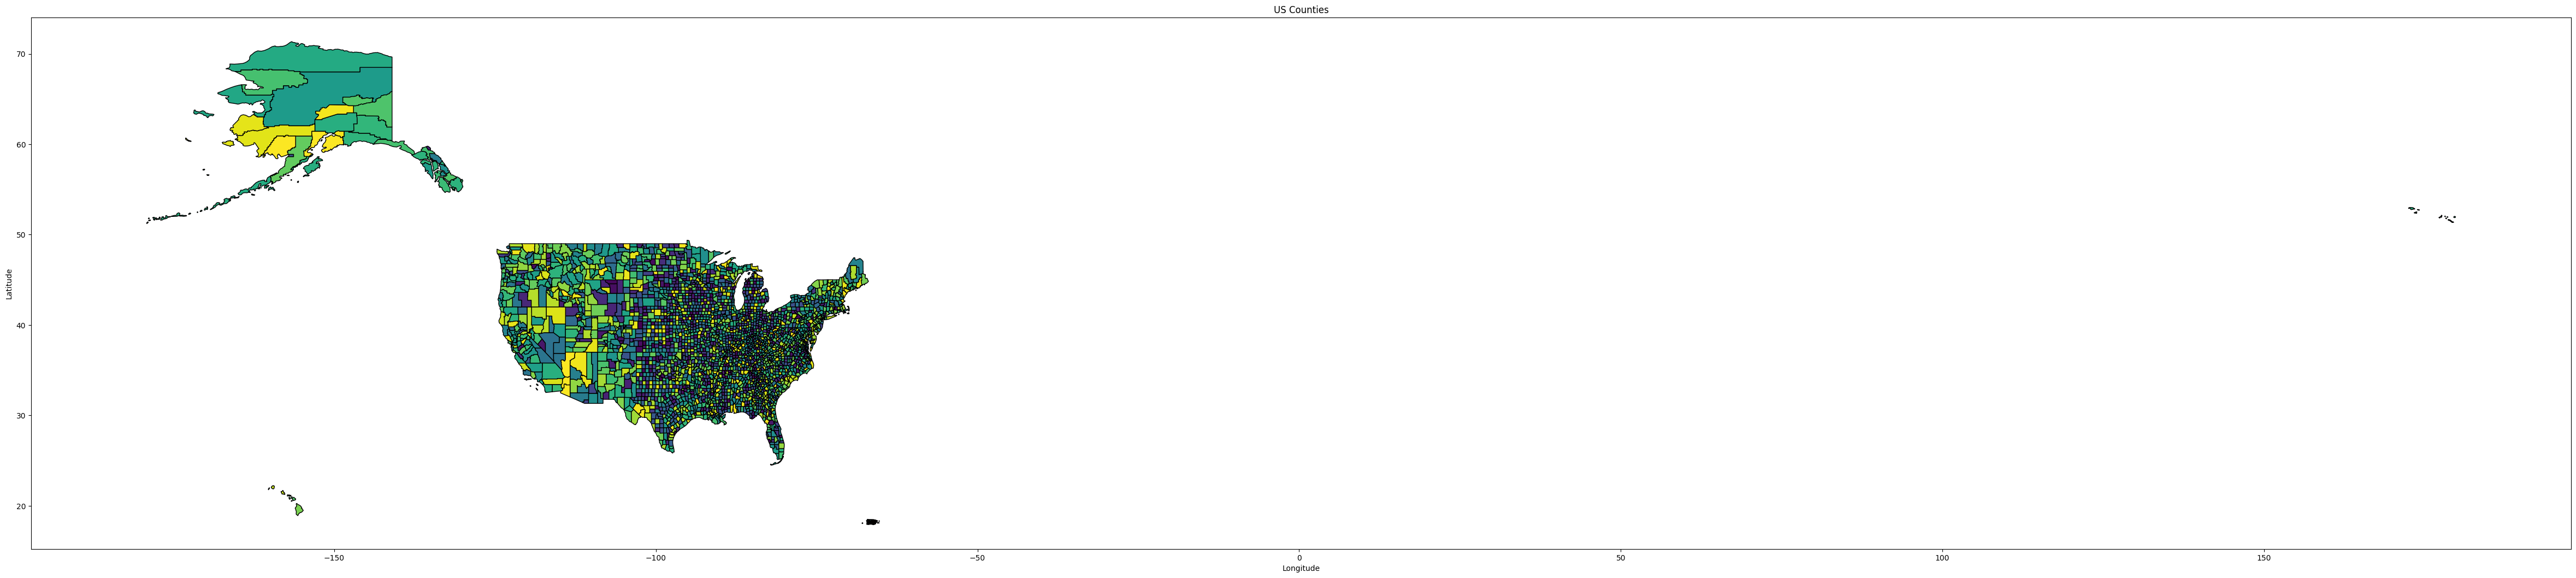

In [174]:

    # Plot the map
us_counties.plot(figsize=(60, 60), edgecolor='black', cmap='viridis')
plt.title('US Counties')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()